<a href="https://colab.research.google.com/github/kaajalguptaa/Earthquake/blob/main/LiverPatientPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Liver Patient prediction 
###### by Mohammad Ovesh, Kajal kumari S, Deepak Raj
###### Team ID : PTID-CDS-JUL22-1335
###### Project ID: PCRP-1007-LiverPatientPred

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
from sklearn.neighbors import KNeighborsClassifier
from xgboost import  XGBClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report, roc_auc_score, roc_curve,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score

In [ ]:
# Ignoring the warnings so that our notebook looks more prettier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/21Ovi/DataScience-DataSets/main/liver.csv")

In [ ]:
data.head()

,Unnamed: 0,age,gender,tot_bilirubin,direct_bilirubin,alk_phos,alamine_aminotransferase,aspartate_aminotransferase,tot_proteins,albumin,ag_ratio,target
0,0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Basic check

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  583 non-null    int64  
 1   age                         583 non-null    int64  
 2   gender                      583 non-null    object 
 3   tot_bilirubin               583 non-null    float64
 4   direct_bilirubin            583 non-null    float64
 5   alk_phos                    583 non-null    int64  
 6   alamine_aminotransferase    583 non-null    int64  
 7   aspartate_aminotransferase  583 non-null    int64  
 8   tot_proteins                583 non-null    float64
 9   albumin                     583 non-null    float64
 10  ag_ratio                    579 non-null    float64
 11  target                      583 non-null    int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 54.8+ KB


Basic Information about given dataset 

In [ ]:
data.shape

(583, 12)

No of rows from the given dataset is **583**

No of columns from the given dataset is **12**

In [ ]:
data.describe() 

,Unnamed: 0,age,tot_bilirubin,direct_bilirubin,alk_phos,alamine_aminotransferase,aspartate_aminotransferase,tot_proteins,albumin,ag_ratio,target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,291.000000,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,168.441879,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,0.000000,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,145.500000,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,291.000000,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,436.500000,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,582.000000,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Statistical Information on **Numerical Dataset**

In [ ]:
data.describe(include='O') 

,gender
count,583
unique,2
top,Male
freq,441


Statistical Information on **Categorical Dataset**

In [ ]:
for label, content in data.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

gender


Total no of Numerical data is **10**

Total no of Categorical data is **1**

# Exploratory Data Analysis

In [ ]:
#pip install sweetviz

In [ ]:
'''import sweetviz as sz
analytics=sz.analyze(data)
analytics.show_html('LiverPrediction.html')'''

"import sweetviz as sz\nanalytics=sz.analyze(data)\nanalytics.show_html('LiverPrediction.html')"

INSIGHTS FROM THE ABOVE UNIVARIATE DATA : 
  
  1. Ages between `30 to 60` has high risk of getting **liver disease**.

  2. `76%` of **Males** are affected by liver disease than **Females(24%)**.
  3. **Total Billirubin** occured frequently between `0.3 to 0.8 mg/dl`, which indicates the patient is **Normal**
  4. Total Billirubin at `75.0 and 42.0 mg/dl` are high, the patient has **high risk** of liver disease.
  5. **Direct Billirubin**( billirubin attached by liver to glucuronic acid) level around `0.1 to 1.2` is high ,which is **normal**
  6. Only few no.of patients`(0.2%)` have **high direct billirubin** around `18.3 to 19.7`.
  7. Alkaline Phosphatase(alk_phos) content is high betweeen `198 -240 IU/L` and **more than 60%** are affected.
  8. Alanine Aminotransferase (`23-25`U/L ) is normal value range, it indicates there is no risk of heart disease.
  9. Patient with Alanine Aminotransferase `2000`U/L, which is more than **10 times the upper limit** of normal Alanine Aminotransferase and it results in **high risk** of liver disease.
  10. High levels of Aspertate Aminotransferase has occured in 0.2% of patients which ranges 4929,2946 U/L.
  11. Total protien levels between `6.0-7.0(g/DL)` are highly occured in patients`(25%)`, which is **normal** and does not involve in affecting the liver.
  12. Only `0.2%` of patients are **highly affected** to the liver disease that ranges around `9.5-9.6 (g/DL)`.
  13. Albumin range betweeen `3.4-5.4 (g/DL)` is normal and does not cause liver disease and around `19%` of patients shows **normal albumin level**.
  14. `5.5g/DL` of Albumin is seen in the blood of liver patient, which is **high** and has occured in `0.3%` of patients
  15. Ratio between **Albumin-globulin** is normal only if it ranges between `1 to 2 AG`, which is found in `43%` of patients. 
  16. **More than 2AG** that is `2.5 and 2.8AG` of Albumin-Globulin ratio is **high** and leads to liver disease, which is found in `0.5%` of patients.

## Bivariate Data Analysis

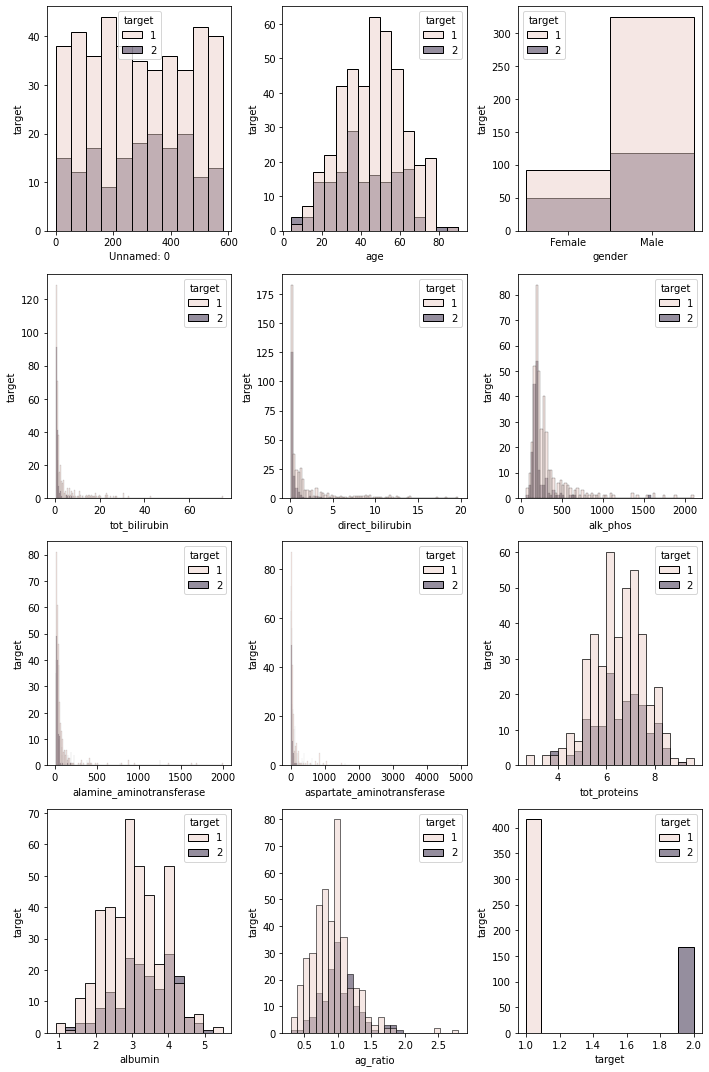

In [ ]:
plt.figure(figsize=(10,15), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 

for column in data: # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=13 :     # as there are 13 columns in the data
        ax = plt.subplot(4,3,plotnumber)# plotting 40 graphs (4-rows,3-columns) ,plotnumber is for count  
        sns.histplot(x=data[column],hue=data.target) ## it give frequency hue =value counts
        plt.xlabel(column,fontsize=10) #assigning name to x-axis and "name" font size is 10
        plt.ylabel('target',fontsize=10)#assigning name to y-axis and "name" font size is 10
    plotnumber+=1 # increment of plotnumber 
plt.tight_layout()#to show plot

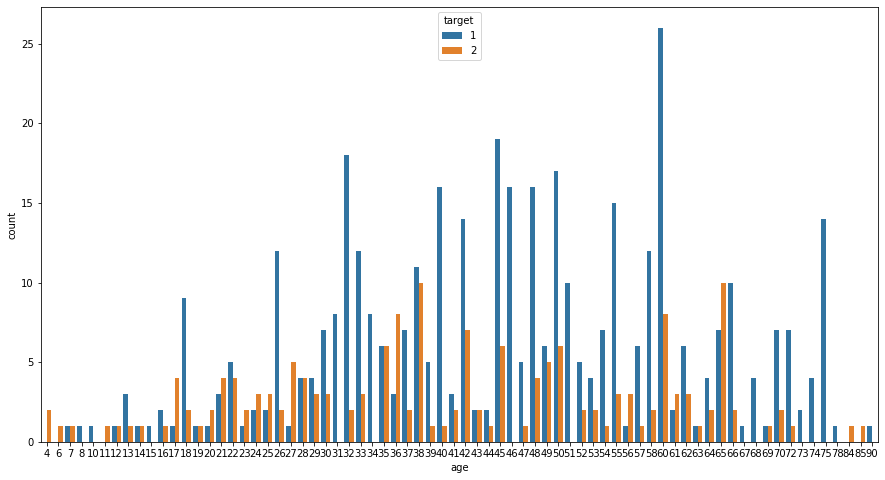

In [ ]:
plt.figure(figsize=(15,8))
ax=sns.countplot(x='age',hue='target',data=data);

  INSIGHTS FROM THE ABOVE BIVARIATE DATA : 
  
  1. Liver disease is increasing with increase in age.

  2. Age above **18** is **highly** affected by liver disease.  
  
  3. People at the Age **38 and 66** are **highly** affected.

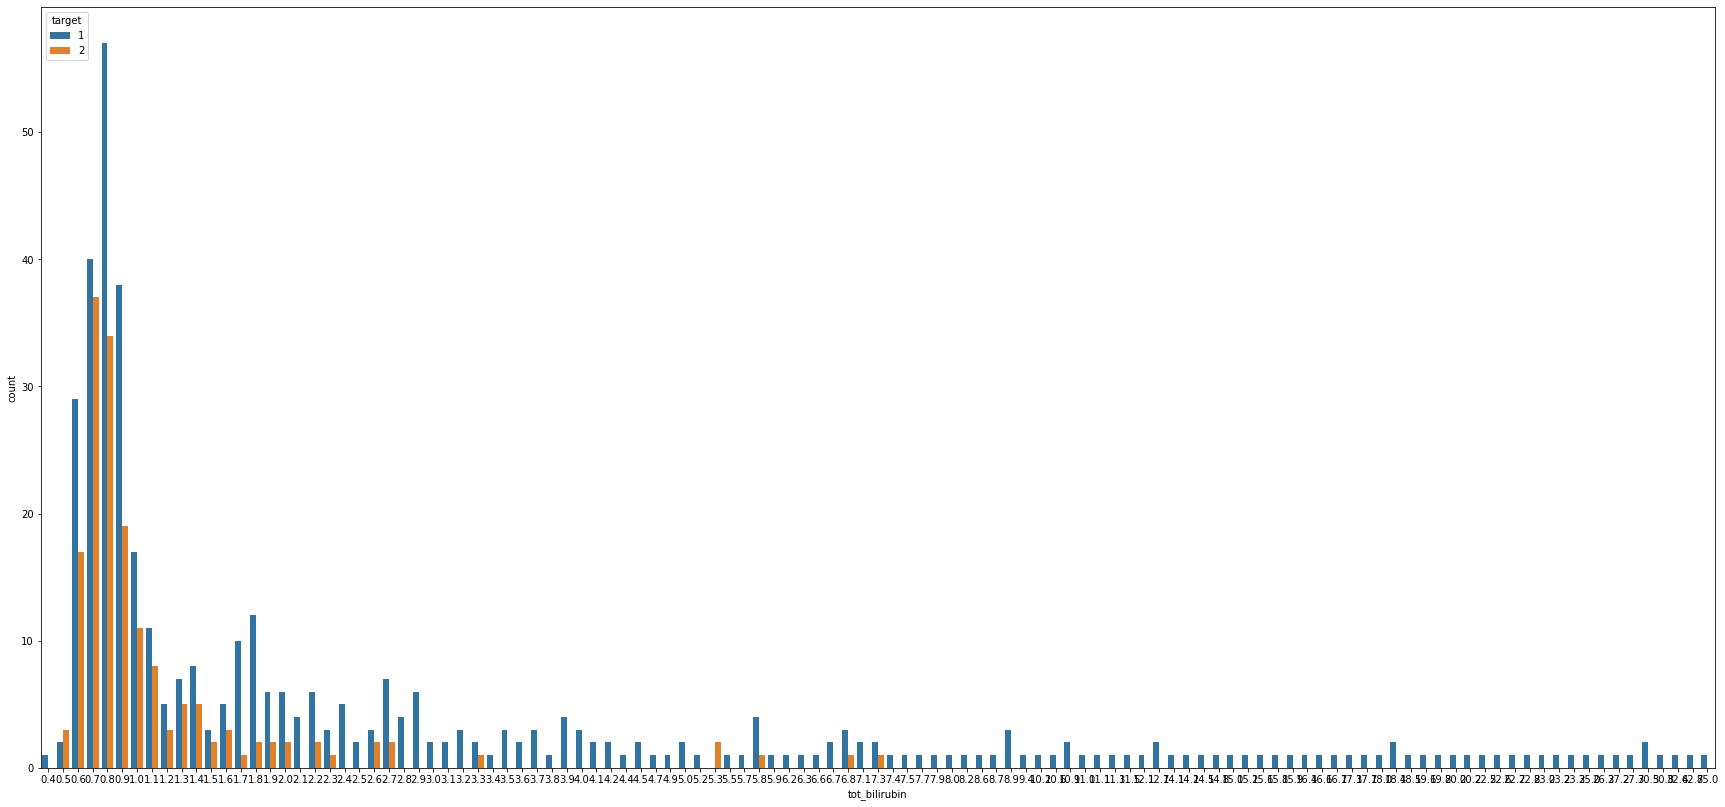

In [ ]:
plt.figure(figsize=(30,14))
ax=sns.countplot(x='tot_bilirubin',hue='target',data=data);

  INSIGHTS FROM THE ABOVE BIVARIATE DATA : 
  
  1. Total bilirubin level is high between `55 to 82`.

  2. the post between `60 to 85` are highly

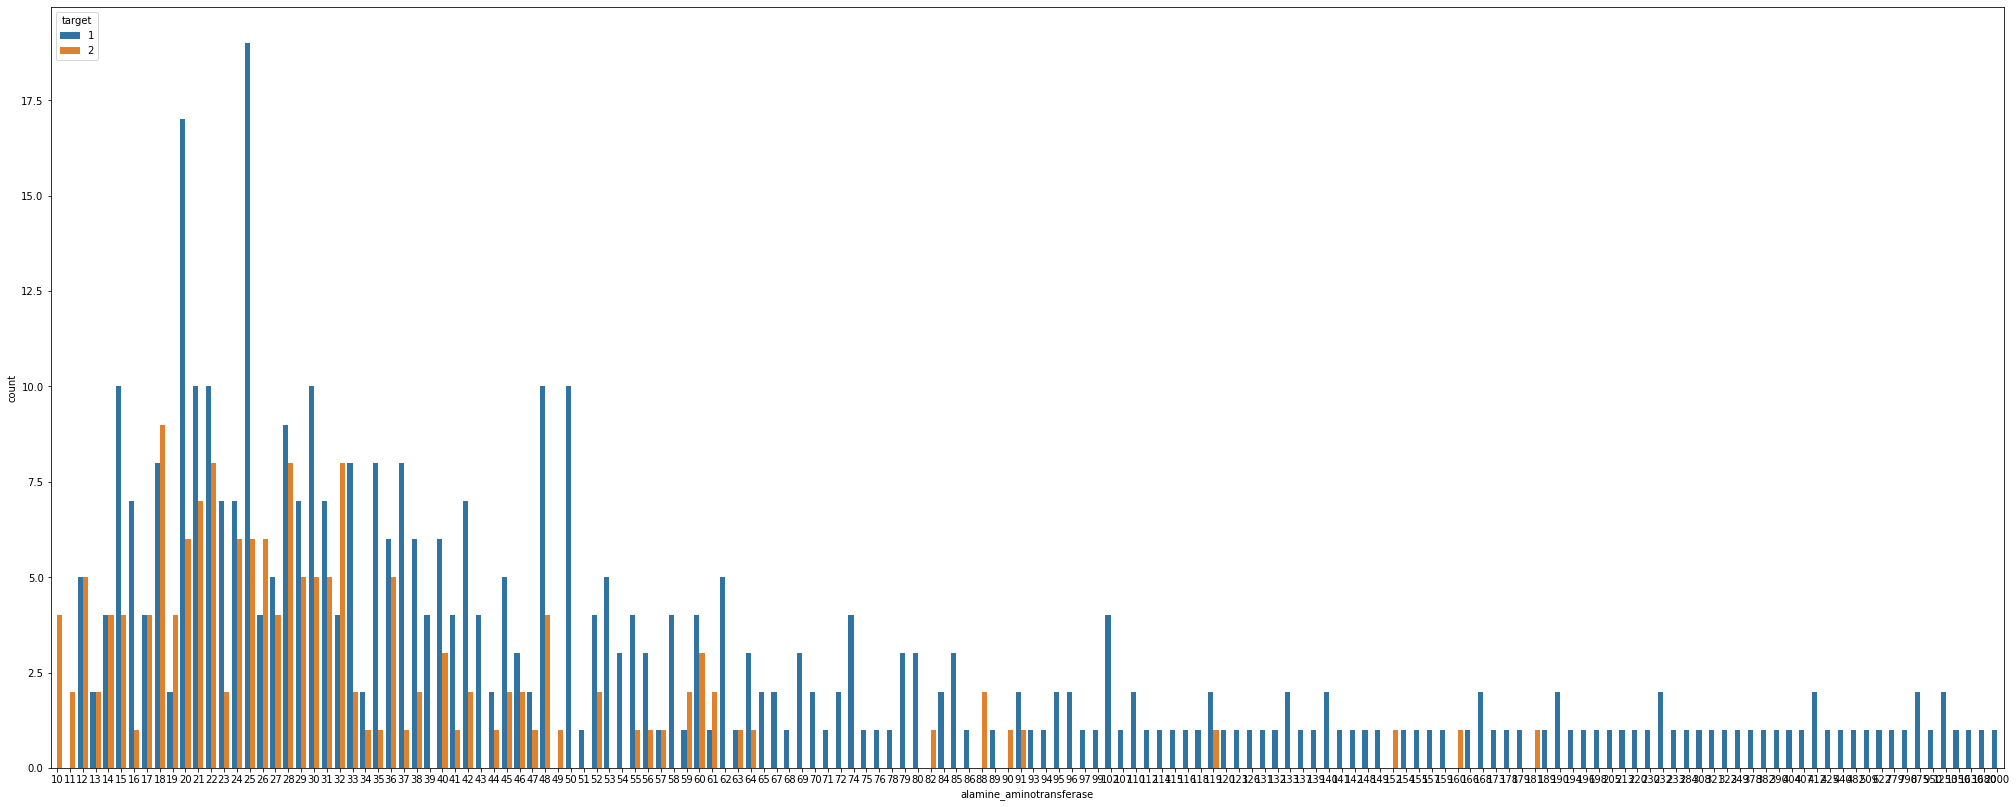

In [ ]:
plt.figure(figsize=(35,14))
ax=sns.countplot(x='alamine_aminotransferase',hue='target',data=data);

  INSIGHTS FROM THE ABOVE BIVARIATE DATA : 
  
  1. alamine_aminotransferase between `10 to 62` is high

  2. the post between `10 to 33` are highly

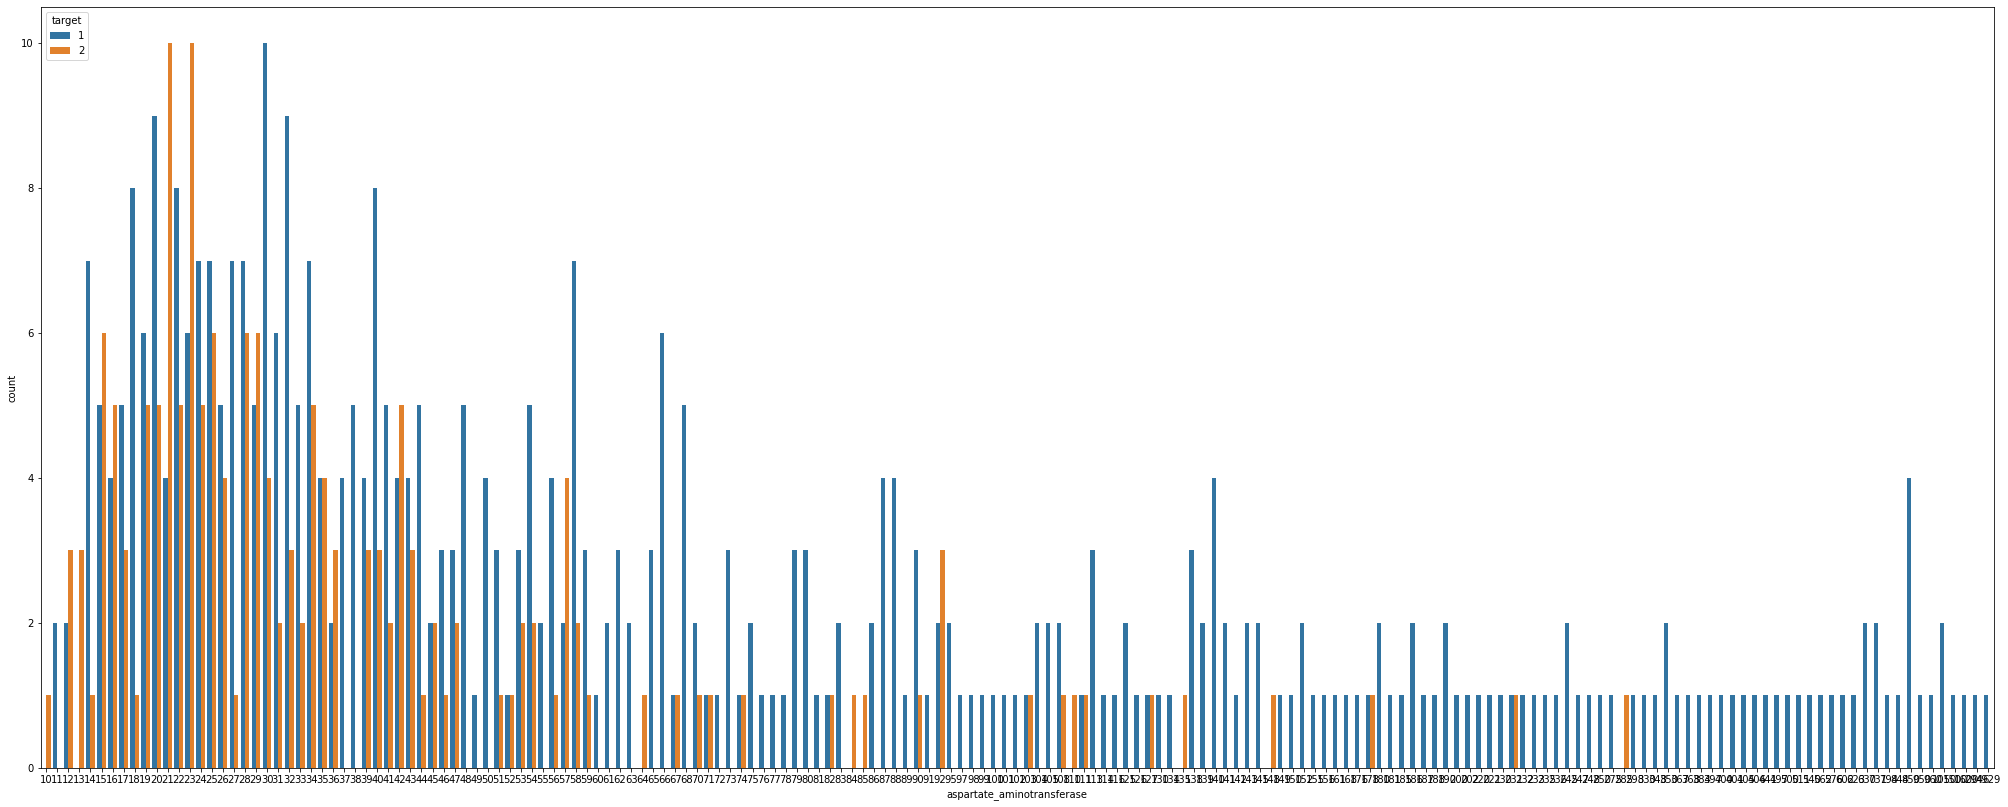

In [ ]:
plt.figure(figsize=(35,14))
ax=sns.countplot(x='aspartate_aminotransferase',hue='target',data=data);

  INSIGHTS FROM THE ABOVE BIVARIATE DATA : 
  
  1. asperate_aminotransferase between `55 to 82`is high

  2. the post between `10 to 85` are highly

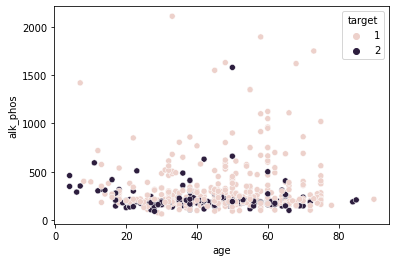

In [ ]:
sns.scatterplot(x='age',y='alk_phos',hue='target',data=data);

  INSIGHTS FROM THE ABOVE BIVARIATE DATA : 
  
  1. alk_phos increases with increase in age 

  2.Age above **18** are **highly** affected by liver disease  
  
  3.People at the Age **38 and 66** are **highly** affected

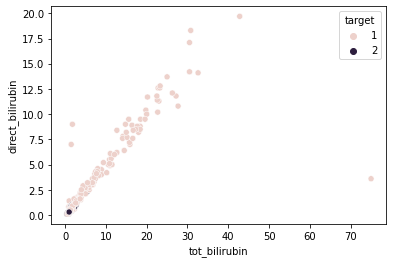

In [ ]:
sns.scatterplot(x='tot_bilirubin',y='direct_bilirubin',hue='target',data=data);

  INSIGHTS FROM THE ABOVE BIVARIATE DATA : 
  
  1. Total bilirubin **increases with increase in direct_bilirubin**.

  2. People with less liver disease are many.
  

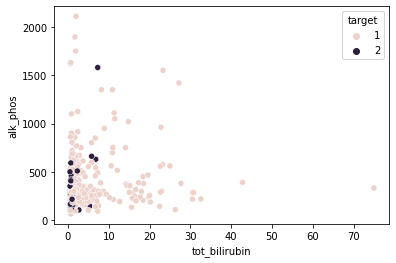

In [ ]:
sns.scatterplot(x='tot_bilirubin',y='alk_phos',hue='target',data=data);

  INSIGHTS FROM THE ABOVE BIVARIATE DATA : 
  
  1. Total bilirubin is **increasing with decrease in alk_phos** .

  2. People with less liver disease are many.  
  

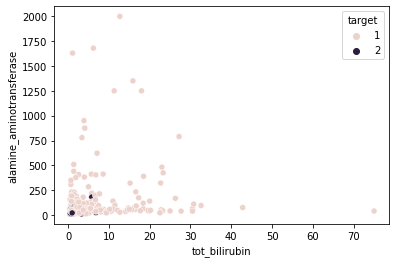

In [ ]:
sns.scatterplot(x='tot_bilirubin',y='alamine_aminotransferase',hue='target',data=data);

  INSIGHTS FROM THE ABOVE BIVARIATE DATA : 
  
  1. Total bilirubin is **increasing with decrease in alamine_aminotransferase**.

  2. People with less liver disease are many. 

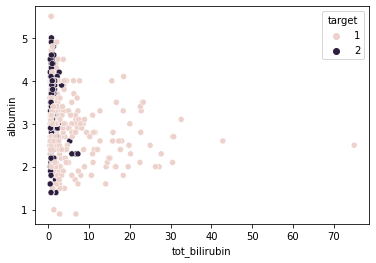

In [ ]:
sns.scatterplot(x='tot_bilirubin',y='albumin',hue='target',data=data);

  INSIGHTS FROM THE ABOVE BIVARIATE DATA : 
  
  1. Total bilirubin is **increasing with decrease in albumin**.

  2. People with less liver disease are many.  

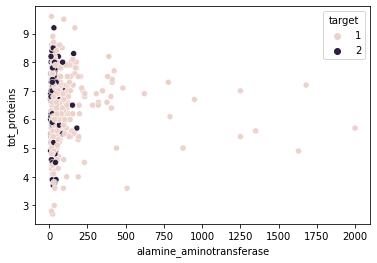

In [ ]:
sns.scatterplot(x='alamine_aminotransferase',y='tot_proteins',hue='target',data=data);

  INSIGHTS FROM THE ABOVE BIVARIATE DATA : 
  
  1. alamine_aminotransferase is **increasing with decrease in tot_proteins**.

  2. People with less liver disease are  many.

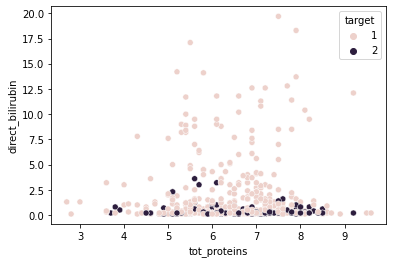

In [ ]:
sns.scatterplot(x='tot_proteins',y='direct_bilirubin',hue='target',data=data);

  INSIGHTS FROM THE ABOVE BIVARIATE DATA : 
  
  1. tot_proteins **increases with increase in direct_bilirubin**. 

  2. People with less liver disease are many.  

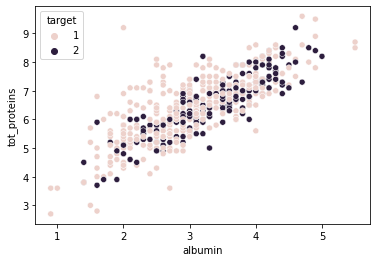

In [ ]:
sns.scatterplot(x='albumin',y='tot_proteins',hue='target',data=data);

  INSIGHTS FROM THE ABOVE BIVARIATE DATA : 
  
  1. albumin is **increasing with increase in tot_protein**. 

  2. People with less liver disease are many.  

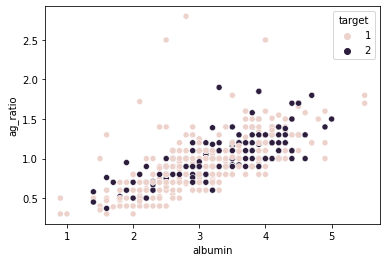

In [ ]:
sns.scatterplot(x='albumin',y='ag_ratio',hue='target',data=data);

  INSIGHTS FROM THE ABOVE BIVARIATE DATA : 
  
  1. albumin is **increasing with increase in ag_ration**.

  2. People with less liver disease are many.

# DataPreprocessing

In [ ]:
data.duplicated().sum()

0

No **Duplicate Values**

In [ ]:
data.isnull().sum()

Unnamed: 0                    0
age                           0
gender                        0
tot_bilirubin                 0
direct_bilirubin              0
alk_phos                      0
alamine_aminotransferase      0
aspartate_aminotransferase    0
tot_proteins                  0
albumin                       0
ag_ratio                      4
target                        0
dtype: int64

ag_ration has **4 null values**

## Convert Categorical to numerial

In [ ]:
#label encoder
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data['gender']=lc.fit_transform(data['gender'])

Changed **gender datatype from categorical to numerical**

## Drop unwanted column

In [ ]:
data.drop('Unnamed: 0',axis=1,inplace=True)

Drop unamed column

In [ ]:
data

,age,gender,tot_bilirubin,direct_bilirubin,alk_phos,alamine_aminotransferase,aspartate_aminotransferase,tot_proteins,albumin,ag_ratio,target
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


## Preprocessing Null values

In [ ]:
data[data['ag_ratio'].isnull()==True]

,age,gender,tot_bilirubin,direct_bilirubin,alk_phos,alamine_aminotransferase,aspartate_aminotransferase,tot_proteins,albumin,ag_ratio,target
209,45,0,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,1,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,0,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,1,1.3,0.6,106,25,54,8.5,4.8,NaN,2


Null value rows

In [ ]:
data.loc[data['ag_ratio'].isnull()==True,'ag_ratio']=data.ag_ratio.median()

Replace **Null values** with **median**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         583 non-null    int64  
 1   gender                      583 non-null    int64  
 2   tot_bilirubin               583 non-null    float64
 3   direct_bilirubin            583 non-null    float64
 4   alk_phos                    583 non-null    int64  
 5   alamine_aminotransferase    583 non-null    int64  
 6   aspartate_aminotransferase  583 non-null    int64  
 7   tot_proteins                583 non-null    float64
 8   albumin                     583 non-null    float64
 9   ag_ratio                    583 non-null    float64
 10  target                      583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


NO **Null** values in **ag_ratio** column

# Modeling

## Splitting data into Training and Testing

In [ ]:
X=data.iloc[:,0:-1]  #independent variable
y=data.target   #target variable

**X** is **independent** variable

**y** is **dependent** variable

In [ ]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Spliting training and test data

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(466, 10) (466,) (117, 10) (117,)


## Feature Selection

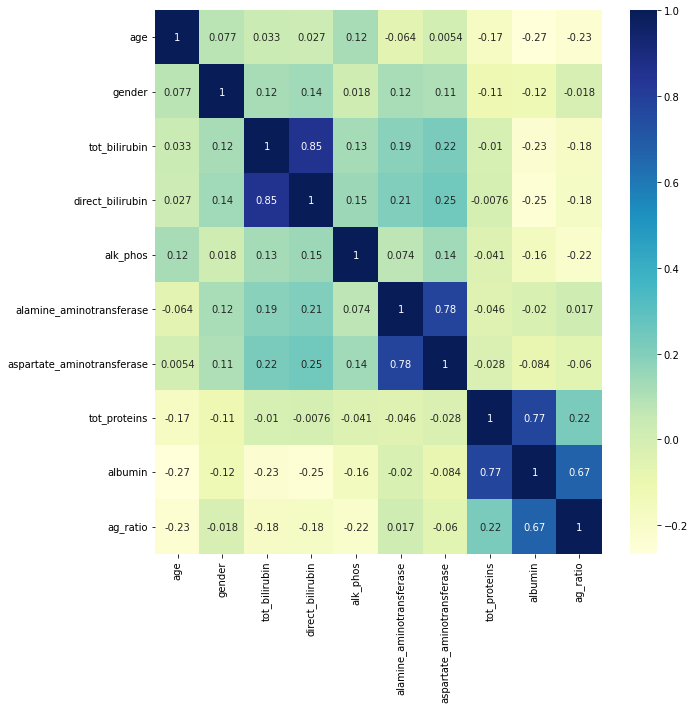

In [ ]:
plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.YlGnBu)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

Set the threashold to find **Highly correlation columns**

In [ ]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

3

**3 Columns** are highly correlated

In [ ]:
corr_features

{'albumin', 'aspartate_aminotransferase', 'direct_bilirubin'}

Correlated columns

## Dropping Highly correlated features

In [ ]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,age,gender,tot_bilirubin,alk_phos,alamine_aminotransferase,tot_proteins,ag_ratio
355,19,1,1.4,178,13,8.0,1.30
407,12,1,1.0,719,157,7.2,1.00
90,60,1,5.7,214,412,7.3,0.78
402,42,0,0.5,162,155,8.1,0.90
268,40,1,14.5,358,50,5.7,0.50
...,...,...,...,...,...,...,...
516,60,1,0.9,168,16,6.7,0.80
305,54,0,1.4,195,36,7.9,0.90
167,47,0,3.0,292,64,5.6,0.47
312,27,1,1.3,106,25,8.5,0.93


## Modeling

Now we've got our data splitted into training and testing sets, it's time to build a machine learning model.

We'll Train it (finding patterns) on the training set.

and then test it testing set

selecting a model from : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

after having a look I found some model to work with.

We're going to try 6 different Machine Learning Model:
1. `Logistic Regression`
2. `K-Nearest neighbours Classifer`
3. `RandomForestClassifer`
4. `SVC Classifier`
5. `XGBOOST Classifier`
6. `SGD Classifier`

So rather then initiating then fitting and then scoring `one by one` Let's create a function


In [ ]:
# Putting Models in a Dictionary to make our function more dynamic
models = {
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier(),
    "SVC":SVC(),
    "Xgboost":XGBClassifier(),
    "SGD":SGDClassifier()

}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
  """
  Fits and evaluate given machine learning models.
  Models: a dictionary of diccerent sklearn Machine Learnng Models
  X_train : Training data (no labeles)
  X_test : Testing data (no labels)
  y_train : Training labels
  y_test : Test labels
  """
  # Setting up Random seeds
  np.random.seed(42)
  # Make a dictionary to keep model scores
  model_scores ={}
  # Loop through models
  for name, model in models.items():
    # Fit the model to data
    model.fit(X_train.drop(corr_features,axis=1), y_train)
    # Evaluate the model and append its score to model_scores
    model_scores[name] = model.score(X_test.drop(corr_features,axis=1),y_test)
  return model_scores

In [ ]:
%time
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train = y_train,
                             y_test = y_test)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


In [ ]:
model_scores

{'Logistic Regression': 0.7606837606837606,
 'KNN': 0.7094017094017094,
 'Random Forest': 0.7606837606837606,
 'SVC': 0.7435897435897436,
 'Xgboost': 0.7863247863247863,
 'SGD': 0.7435897435897436}

Let's visulaize the model comparision before goin any further

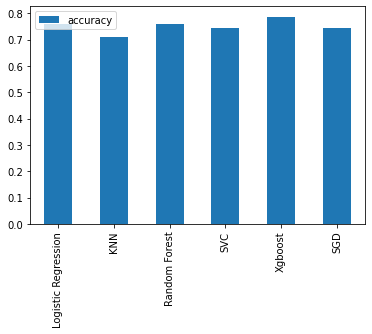

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

As we can see `LogisticRegressor`,`XGBoost Classification`,`SVC Classification`,`RandomForestClassifer`.`SGD Classification` performs best while `KNN` was slightly behind

but still, model's first predictions aren't always what we should based our next step off.

so let's do Hyperparameter Tuning

# Hyper Tuning

## Logistic Regression

In [ ]:
# Creating a hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifer
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

So now rather than doing hyperparamer tuning by hand or manully let's use `RandomizedSearchCV`

In [ ]:
np.random.seed(42)

# setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LoisticRegression
rs_log_reg.fit(X_train.drop(corr_features,axis=1), y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 545.5594781168514}

In [ ]:
rs_log_reg.score(X_test.drop(corr_features,axis=1),y_test)

0.7692307692307693

After Tuned Logistic Regression and got best score as **0.76** is slighly **higher** than before tuning

## k Nearest Neighbor

In [ ]:
%time
# Let's Tune KNN

train_scores = []
test_scores = []

#create a list of different values of n_neighbours
neighbours = range(1,10)

# setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neigbours
for i in neighbours:
  knn.set_params(n_neighbors = i)

  # Fit the algorithm
  knn.fit(X_train.drop(corr_features,axis=1), y_train)

  # Update the training score list
  train_scores.append(knn.score(X_train.drop(corr_features,axis=1), y_train))

  # Update the test score list
  test_scores.append(knn.score(X_test.drop(corr_features,axis=1), y_test))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


In [ ]:
train_scores

[1.0,
 0.8111587982832618,
 0.8068669527896996,
 0.7618025751072961,
 0.7746781115879828,
 0.7424892703862661,
 0.7575107296137339,
 0.7446351931330472,
 0.7575107296137339]

In [ ]:
test_scores

[0.6923076923076923,
 0.7094017094017094,
 0.6495726495726496,
 0.7008547008547008,
 0.7094017094017094,
 0.7094017094017094,
 0.7008547008547008,
 0.7008547008547008,
 0.7264957264957265]

Maximum KNN score on the test data: 0.7264957264957265


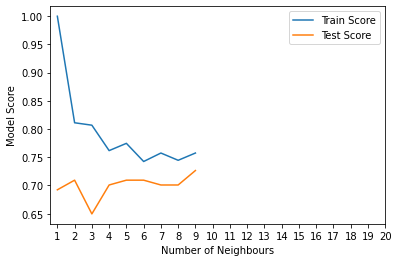

In [ ]:
plt.plot(neighbours, train_scores, label = "Train Score")
plt.plot(neighbours, test_scores, label = "Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbours")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data:",max(test_scores) )


So we Tuned KNN and got best score as **0.72**

## Stochastic Gradient Descent

In [ ]:
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge',  
'perceptron'] 
penalty = ['l1', 'l2', 'elasticnet'] 
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive'] 

eta0 = [1, 10, 100] 

In [ ]:
param_distributions = dict(loss=loss, 
penalty=penalty, 
alpha=alpha, 
learning_rate=learning_rate, 

eta0=eta0) 

So now rather than doing hyperparamer tuning by hand or manully let's use `RandomizedSearchCV`

In [ ]:
np.random.seed(42)
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5) 
random = RandomizedSearchCV(estimator=sgd, 
param_distributions=param_distributions, 
scoring='roc_auc', 
verbose=1, n_jobs=-1, 
n_iter=1000) 

In [ ]:
random_result = random.fit(X_train.drop(corr_features,axis=1), y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


In [ ]:
random_result.best_params_

{'penalty': 'elasticnet',
 'loss': 'squared_hinge',
 'learning_rate': 'optimal',
 'eta0': 10,
 'alpha': 100}

In [ ]:
np.random.seed(42)
sgd1=SGDClassifier(penalty='l2',
 loss = 'hinge',
 learning_rate = 'optimal',
 eta0 = 100,
 alpha = 1000)

In [ ]:
sgd1.fit(X_train.drop(corr_features,axis=1),y_train)

SGDClassifier(alpha=1000, eta0=100)

In [ ]:
sgd1.score(X_test.drop(corr_features,axis=1),y_test)

0.7435897435897436

After Tuned Stochastic Gradient Descent and got best score as **0.74** as **same** as before tuning.

## Random Forest Classification

In [ ]:
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
n_estimators

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = list(range(1,11))
min_samples_leaf = list(range(1,11))
bootstrap = [True, False] 

    
params={
  'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap
     
}


In [ ]:
np.random.seed(42)
RC1=RandomForestClassifier()

So now rather than doing hyperparamer tuning by hand or manully let's use `RandomizedSearchCV`

In [ ]:
RS=RandomizedSearchCV(estimator=RC1, scoring='f1',param_distributions=params, n_iter=100, cv=3, 
                               verbose=3, random_state=42, n_jobs=-1)

RS.fit(X_train.drop(corr_features,axis=1),y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
 

In [ ]:
RS.best_estimator_

RandomForestClassifier(max_depth=100, max_features='sqrt', min_samples_leaf=8,
                       min_samples_split=7, n_estimators=2000)

In [ ]:
best_params=RS.best_params_ #best_params


In [ ]:
best_params

{'n_estimators': 2000,
 'min_samples_split': 7,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

In [ ]:
np.random.seed(42)
model_RC=RandomForestClassifier(max_features='sqrt', min_samples_leaf=7,
                       min_samples_split=7, n_estimators=600, bootstrap= True) #fit with best_params
model_RC.fit(X_train.drop(corr_features,axis=1), y_train)

RandomForestClassifier(max_features='sqrt', min_samples_leaf=7,
                       min_samples_split=7, n_estimators=600)

In [ ]:
model_RC.score(X_test.drop(corr_features,axis=1),y_test)

0.7606837606837606

After Random Forest Classification Tuned and got best score as **0.76** as **same** as before tuning.

## Support Vector Classification

In [ ]:
#Hyper params
params={'C':[0.1,0.2,1,10,100,1000,10000,100000],
         'gamma':[0.1,0.01,0.001,0.0001,0.00001]}

So now rather than doing hyperparamer tuning by hand or manully let's use `GridSearchCV`

In [ ]:
#GridSearchCV

svc_grid=GridSearchCV(SVC(random_state=42),params,scoring='f1',
    n_jobs=-1,
    refit=True,
    verbose=3,                  
    cv=3)
svc_grid.fit(X_train.drop(corr_features,axis=1), y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 1, 10, 100, 1000, 10000, 100000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001, 1e-05]},
             scoring='f1', verbose=3)

In [ ]:
svc_grid.best_estimator_ 

SVC(C=1, gamma=0.1, random_state=42)

In [ ]:
best_params=svc_grid.best_params_ #best_params
best_params

{'C': 1, 'gamma': 0.1}

In [ ]:
svc_best_params=SVC(C=1, gamma=0.1, random_state=42,verbose=3)

In [ ]:
svc_best_params

SVC(C=0.1, gamma=0.1, random_state=42, verbose=3)

In [ ]:
svc_best_params.fit(X_train.drop(corr_features,axis=1), y_train)

[LibSVM]

SVC(C=0.1, gamma=0.1, random_state=42, verbose=3)

In [ ]:
svc_best_params.score(X_test.drop(corr_features,axis=1),y_test)

0.7435897435897436

Afte Tuned **SVC** and got **0.74** as same as before tuning.

## XGBOOST Classification

In [ ]:
params_xg={
    'gamma':[x for x in np.linspace(0,100,1000)],
    'max_depth':[int(x) for x in range(1,11)],

    'n_estimators':[int(x) for x in np.arange(1,200)],
    'learning_rate':[0.01,0.02,0.03,0.05,0.1,0.2,0.300000012,0.4,0.5]
}

In [ ]:
XG=XGBClassifier(random_state=42)

So now rather than doing hyperparamer tuning by hand or manully let's use `RandomizedSearchCV`

In [ ]:
Xg_RS=RandomizedSearchCV(estimator=XG, scoring='f1',param_distributions=params_xg, n_iter=100, cv=3, 
                               verbose=3, random_state=42, n_jobs=-1)

Xg_RS.fit(X_train.drop(corr_features,axis=1), y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'gamma': [0.0, 0.1001001001001001,
                                                  0.2002002002002002,
                                                  0.3003003003003003,
                                                  0.4004004004004004,
                                                  0.5005005005005005,
                                                  0.6006006006006006,
                                                  0.7007007007007008,
                                                  0.8008008008008008,
                                                  0.9009009009009009,
                                                  1.001001001001001,
                                                  1.1011011011011012,
                                                  1.2012012012012012,
                                               

In [ ]:
Xg_RS.best_estimator_ #best_estimator

XGBClassifier(gamma=89.8898898898899, learning_rate=0.2, max_depth=7,
              n_estimators=155, random_state=42)

In [ ]:
best_params_xg=Xg_RS.best_params_ #best_params
best_params_xg

{'n_estimators': 155,
 'max_depth': 7,
 'learning_rate': 0.2,
 'gamma': 89.8898898898899}

In [ ]:
xg_boost=XGBClassifier(gamma=89.8898898898899, learning_rate=0.2, max_depth=7,
              n_estimators=155, random_state=42)
xg_boost.fit(X_train.drop(corr_features,axis=1), y_train) #fit

XGBClassifier(gamma=89.8898898898899, learning_rate=0.2, max_depth=7,
              n_estimators=155, random_state=42)

In [ ]:
xg_boost.score(X_test.drop(corr_features,axis=1),y_test)

0.7435897435897436

After Tuned XGBPOOOST Classifier and got best score as **0.74** as slightly less than before tunning

RESULT: 

Lets tabulate the different models and their accuracies , compare them and to find **Best fit model.**

In [ ]:
#pip install tabulate

In [ ]:
from tabulate import tabulate

In [ ]:
table =[['RESULT:'],['MACHINE LEARNING MODEL', 'ACCURACY'],['Logistic Regression','0.76'],['K-Nearest Neibour','0.72'],['Random Forest','0.76'],['Support Vector Classifier','0.74'],['XGBoost','0.74'],['Stochastic Gradient Descent','0.74']]

In [ ]:
print(tabulate(table))

---------------------------  --------
RESULT:
MACHINE LEARNING MODEL       ACCURACY
Logistic Regression          0.76
K-Nearest Neibour            0.72
Random Forest                0.76
Support Vector Classifier    0.74
XGBoost                      0.74
Stochastic Gradient Descent  0.74
---------------------------  --------


# Conclusion

  * From the above result table, we can see that ML model **Logistic Regression** and **Random Forest**  gives a good accuracy of `76%`.
  * **SVC**, **SGD** and **SGD** with `74%` accuracy.
  * **KNN Model** gives a less accuracy of `72%` as compared to other models.

  Thus we conclude that our model(**Logistic Regression** and **RandomForest Classifier**) performed with an **accuracy of 76%**, which is the best fit model for Liver Patient Prediction.
